In [95]:
using Plots
gr()


# integration helper functions
mid_point(; f, a, b) = (b-a)*f((a+b)/2)
trap(; f, a, b) = (b-a)*(f(a)+f(b))/2
simpson(; f, a, b) = (b-a)*(f(a)+4*f((a+b)/2)+f(b))/6


# Abscissas for guass
legendre_roots = [
    [sqrt(3)/3, -sqrt(3)/3],
    [0, sqrt(15)/5, -sqrt(15)/5],
    [sqrt(525-70*sqrt(30))/35, -sqrt(525-70*sqrt(30))/35, 
        sqrt(525+70*sqrt(30))/35, -sqrt(525+70*sqrt(30))/35
    ],
    [0, sqrt(245-14*sqrt(70))/21, -sqrt(245-14*sqrt(70))/21,
        sqrt(245+14*sqrt(70))/21, -sqrt(245+14*sqrt(70))/21
    ]
]


# self-explanatory
legendre_weights = [
    [1, 1],
    [8/9, 5/9, 5/9],
    [(18+sqrt(30))/36, (18+sqrt(30))/36, (18-sqrt(30))/36, (18-sqrt(30))/36],
    [128/225, (322+13*sqrt(70))/900, (322+13*sqrt(70))/900,
        (322-13*sqrt(70))/900, (322-13*sqrt(70))/900
    ]
]


# integrate a function 'f' over a given interval 'intvl'
# using 'mthd' mid_point, trap, or simpson, and number
# of sub-intervals 'n'
function integrate(; f, mthd, intvl::Tuple, n::Int, deg=3)
    a, b = intvl # unpack the tuple
    a, b = minmax(a, b) # rearrange so a, b correspond to the correct endpoints
    subs = collect(a:(b-a)/n:b) # construct an array of sub intervals
    k = length(subs)-1

    if string(mthd) == "gauss"
        return sum(mthd(f=f, a=subs[i], b=subs[i+1], n=deg) for i in 1:k)
    end

    # composite area sum using given 'mthd'
    return sum(mthd(f=f, a=subs[i], b=subs[i+1]) for i in 1:k)
end


# integrate a function f on the interval [a, b]
# using Gaussian quadrature with n points
function gauss(; f, a, b, n=3)
    # transform the interval [a,b] to [-1, 1]
    x(t) = 0.5*(t*(b-a)+a+b)
    xx = x.(legendre_roots[n-1])
    ww = legendre_weights[n-1]

    # evaluate the sum of the weights and the transformed function f
    return 0.5*(b-a)*sum(wi*f(xi) for (wi, xi) in zip(ww, xx))
end


# plot errors for all three methods
function error_plot(; f, exact, intvl)
    mdp_err = []
    tpz_err = []
    smp_err = []
    gss_err = []
    
    nvals = [2^p for p in 1:10]
    
    p = plot([], [], label="", title="absolute error vs # subintervals", size=(900,900),
        xlabel="# subintervals", ylabel="absolute error",
        xticks=nvals, xaxis=:log, xformatter=x -> round(x), yaxis=:log)
    
    for n in nvals
        mdp = abs(exact - integrate(f=f, intvl=intvl, mthd=mid_point, n=n))
        tpz = abs(exact - integrate(f=f, intvl=intvl, mthd=trap, n=n))
        smp = abs(exact - integrate(f=f, intvl=intvl, mthd=simpson, n=n))
        gss = abs(exact - integrate(f=f, intvl=intvl, mthd=gauss, n=n, deg=3))
        
        push!(mdp_err, mdp)
        push!(tpz_err, tpz)
        push!(smp_err, smp)
        push!(gss_err, gss)
    end
    
    plot!(p, nvals, mdp_err, lc=:teal, lw=4, label="midpoint")
    plot!(p, nvals, tpz_err, lc=:gold, lw=4, label="trapezoid")
    plot!(p, nvals, smp_err, lc=:pink, lw=4, label="simpson's")
    plot!(p, nvals, gss_err, lc=:cyan, lw=4, label="gauss")
    
    savefig(p, "error plot for approximating $(exact)")
    
    p
end;

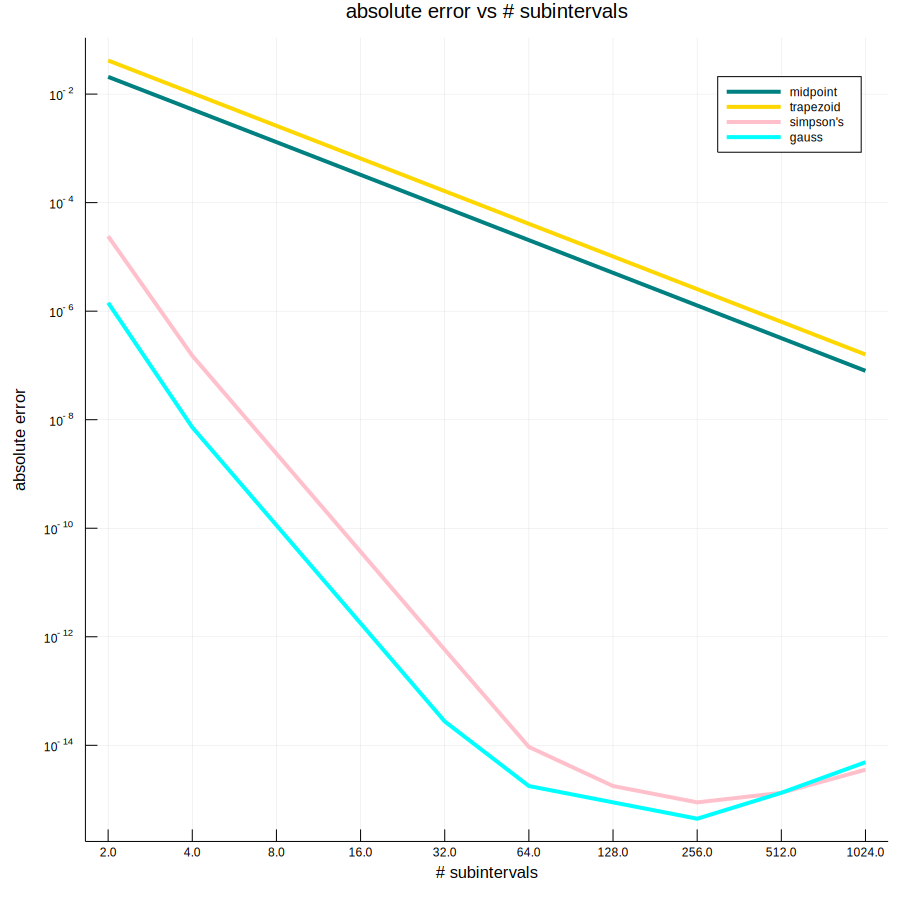

In [96]:
error_plot(f=x -> 4/(1+x^2), exact=pi, intvl=(0,1))

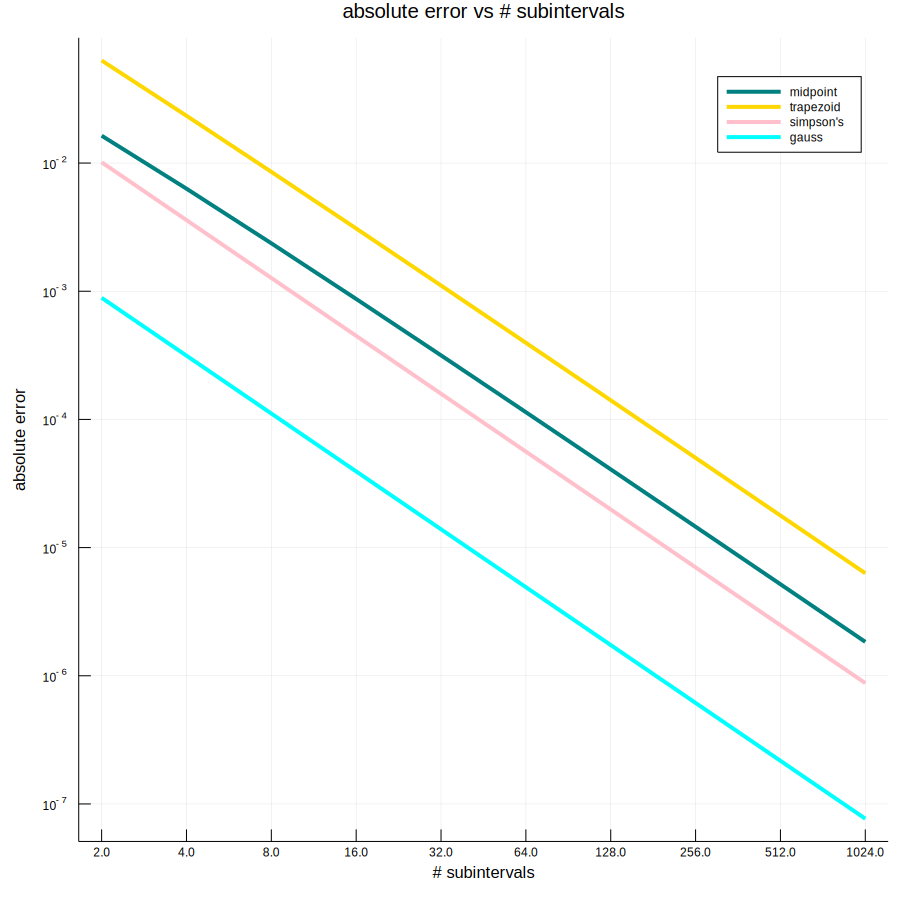

In [97]:
error_plot(f=x -> sqrt(x), exact=2/3, intvl=(0,1))

In [90]:
f(x) = 4/(1+x^2)

integrate(f=f, intvl=(0,1), mthd=gauss, n=1, deg=3)

3.141068139963168

In [98]:
using LinearAlgebra

In [103]:
A = [1 2 0; 2 1 -1; 3 1 1]
B = [1 1 -1 1; 1 2 -4 -2; 2 1 1 5; -1 0 -2 -4]
C = [4 0 0 0; 6 7 0 0; 9 11 1 0; 5 4 1 1]

for (m, n) in zip([A, B, C], ["A", "B", "C"])
    println("det $(n) = $(det(m))")
end

det A = -8.0
det B = 0.0
det C = 28.0


In [111]:
eigvals(A)

3-element Array{Complex{Float64},1}:
 -1.3553013976081199 + 0.0im               
    2.17765069880406 - 1.0773038128499643im
    2.17765069880406 + 1.0773038128499643im

In [110]:
eigvals(C)

4-element Array{Float64,1}:
 1.0
 1.0
 4.0
 7.0

In [106]:
inv(A)

3×3 Array{Float64,2}:
 -0.25    0.25    0.25 
  0.625  -0.125  -0.125
  0.125  -0.625   0.375

In [107]:
inv(C)

4×4 Array{Float64,2}:
  0.25       0.0        0.0  0.0
 -0.214286   0.142857   0.0  0.0
  0.107143  -1.57143    1.0  0.0
 -0.5        1.0       -1.0  1.0

In [128]:
u = [3., -4., 0., 2.]
v = [2., 1., -5., 7.]
w = [0., -1., 2., -4., 8.]

l1(x) = sum(abs.(x))
l2(x) = sqrt(sum(x .^2))
linf(x) = maximum(abs.(x));

for (vec, name) in zip([u, v, w], ["u", "v", "w"])
    println("l1 norm of $(name): $(l1(vec))")
    println(" vs built-in: $(norm(vec, 1))")
    println("l2 norm of $(name): $(l2(vec))")
    println(" vs built-in: $(norm(vec, 2))")
    println("linf norm of $(name): $(linf(vec))")
    println("   vs built-in: $(norm(vec, Inf))\n")
end

l1 norm of u: 9.0
 vs built-in: 9.0
l2 norm of u: 5.385164807134504
 vs built-in: 5.385164807134504
linf norm of u: 4.0
   vs built-in: 4.0

l1 norm of v: 15.0
 vs built-in: 15.0
l2 norm of v: 8.888194417315589
 vs built-in: 8.888194417315589
linf norm of v: 7.0
   vs built-in: 7.0

l1 norm of w: 15.0
 vs built-in: 15.0
l2 norm of w: 9.219544457292887
 vs built-in: 9.219544457292887
linf norm of w: 8.0
   vs built-in: 8.0

